<a href="https://colab.research.google.com/github/yasuke123/perium-/blob/main/NYPD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DAAN 822 Data Collection & Cleaning (2025)
## Group 5: Afolabi Isiaka, Matthew Kucas
## The New York City Police Department Stop-and-Frisk Program: Recent Trends

First import required libraries and data files

In [1]:
#import pandas - will write downloaded data to data frames
import pandas as pd
#import zipfile for zip file extraction
import zipfile
#import urlretrieve from urllib, wich is packaged with Python and can retrieve files directly from the web
from urllib.request import urlretrieve
#import numpy for data handling as needed
import numpy as np
#import matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load Stop and Frisk, Crime, and Population data files
saf_data = pd.read_csv('C:\\Users\\mekna\\OneDrive\\Documents\\PSU\\DAAN_822\\Project\\Data_Warehouse\\NYPD_Stop_and_Frisk.csv', low_memory=False)
crime_data = pd.read_csv('C:\\Users\\mekna\\OneDrive\\Documents\\PSU\\DAAN_822\\Project\\Data_Warehouse\\NYPD_Crime_Data.csv')
census_data = pd.read_csv('C:\\Users\\mekna\\OneDrive\\Documents\\PSU\\DAAN_822\\Project\\Data_Warehouse\\NYC_Census_Data.csv')

# SECTION 1: Analyze Stop and Frisk data

This section analyzes Stop and Frisk data from the data repository -> Stop_and_Frisk_Data.csv.

In [3]:
#View portion of Stop and Frisk data frame
saf_data[0:100]

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm,dettypCM,lineCM,detailCM
0,2012,40,17,1012012,115,1,O,P,2.0,ROBBERY,...,*,,1008031,233036,CM,1,85,NaN,NaN,NaN
1,2012,23,691,1012012,310,1,I,P,2.0,M,...,,12,1000852,228179,CM,1,9,NaN,NaN,NaN
2,2012,81,3714,1012012,2000,1,O,P,1.0,ROBBERY,...,3,,1001869,190702,CM,1,85,NaN,NaN,NaN
3,2012,81,633,1022012,1245,1,O,P,3.0,ROBBERY,...,*,,1005306,186668,CM,1,85,NaN,NaN,NaN
4,2012,66,36,1042012,2220,A,O,P,2.0,FELONY,...,,,986887,173599,CM,1,46,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2012,40,2633,1292012,30,1,I,H,1.0,CRIMINAL TRESPASS,...,*,,1004670,233870,CM,1,31,NaN,NaN,NaN
96,2012,70,1344,1292012,2010,1,I,P,1.0,ROBB,...,*,,994699,176744,CM,1,85,NaN,NaN,NaN
97,2012,67,1266,1292012,2120,1,O,P,1.0,MISD,...,,,1005950,179753,CM,1,20,NaN,NaN,NaN
98,2012,71,628,1302012,1620,1,I,T,5.0,MISD,...,*,,994821,177866,CM,1,68,NaN,NaN,NaN


In [4]:
# Show data types in saf_data
pd.set_option('display.max_rows', None)
data_types = saf_data.dtypes
print(data_types)

year          int64
pct           int64
ser_num       int64
datestop      int64
timestop      int64
recstat      object
inout        object
trhsloc      object
perobs      float64
crimsusp     object
perstop      object
typeofid     object
explnstp     object
othpers      object
arstmade     object
arstoffn     object
sumissue     object
sumoffen     object
compyear      int64
comppct       int64
offunif      object
officrid     object
frisked      object
searched     object
contrabn     object
adtlrept     object
pistol       object
riflshot     object
asltweap     object
knifcuti     object
machgun      object
othrweap     object
pf_hands     object
pf_wall      object
pf_grnd      object
pf_drwep     object
pf_ptwep     object
pf_baton     object
pf_hcuff     object
pf_pepsp     object
pf_other     object
radio        object
ac_rept      object
ac_inves     object
rf_vcrim     object
rf_othsw     object
ac_proxm     object
rf_attir     object
cs_objcs     object
cs_descr     object


In [5]:
# Cast age to integer for statistical analysis (first need to clean a bit by removing space and ** values from the Age field)
saf_data['age'] = saf_data['age'].replace([' '], 0)
saf_data['age'] = saf_data['age'].replace(['**'], 0)
saf_data['age'] = saf_data['age'].astype(int)

# Identify column types
numerical_cols = ['year', 'pct', 'datestop', 'timestop', 'perobs', 'ht_feet', 'ht_inch', 'weight', 'xcoord', 'ycoord', 'age']
binary_cols = ['arstmade', 'sumissue', 'frisked', 'searched', 'pistol', 'riflshot', 'knifcuti']
categorical_cols = ['crimsusp', 'sex', 'race', 'inout', 'trhsloc']  # Start with key categoricals

In [6]:
# Create analysis dataset for numerical and binary columns
analysis_data = saf_data[numerical_cols + binary_cols].copy()

In [7]:
# Verify data - Note that Pandas describe function ignores missing values
print("Data types")
print(analysis_data.dtypes)
print("\nSample of data:")
print(analysis_data.head())
print("\nDescriptive statistics:")
print(analysis_data.describe())

# Check categorical columns for unique values
for col in categorical_cols:
    print(f"\nUnique values in {col}: {saf_data[col].unique()}")

Data types
year          int64
pct           int64
datestop      int64
timestop      int64
perobs      float64
ht_feet       int64
ht_inch       int64
weight        int64
xcoord       object
ycoord       object
age           int32
arstmade     object
sumissue     object
frisked      object
searched     object
pistol       object
riflshot     object
knifcuti     object
dtype: object

Sample of data:
   year  pct  datestop  timestop  perobs  ht_feet  ht_inch  weight   xcoord  \
0  2012   40   1012012       115     2.0        5        9     155  1008031   
1  2012   23   1012012       310     2.0        5        7     175  1000852   
2  2012   81   1012012      2000     1.0        5        9     180  1001869   
3  2012   81   1022012      1245     3.0        5        5     210  1005306   
4  2012   66   1042012      2220     2.0        5        7     170   986887   

    ycoord  age arstmade sumissue frisked searched pistol riflshot knifcuti  
0   233036   20        N        N       Y    

Year Counts
2012    532911
2013    191851
2014     45787
2015     22563
Name: year, dtype: int64

Sex Counts
M    727200
F     55654
Z     10258
Name: sex, dtype: int64

Race Counts
B    424947
Q    186817
W     79167
P     52241
A     27287
Z     13983
U      5326
I      3344
Name: race, dtype: int64

Frisk Counts
Y    454485
N    338627
Name: frisked, dtype: int64

Arrest Counts
N    734488
Y     58624
Name: arstmade, dtype: int64


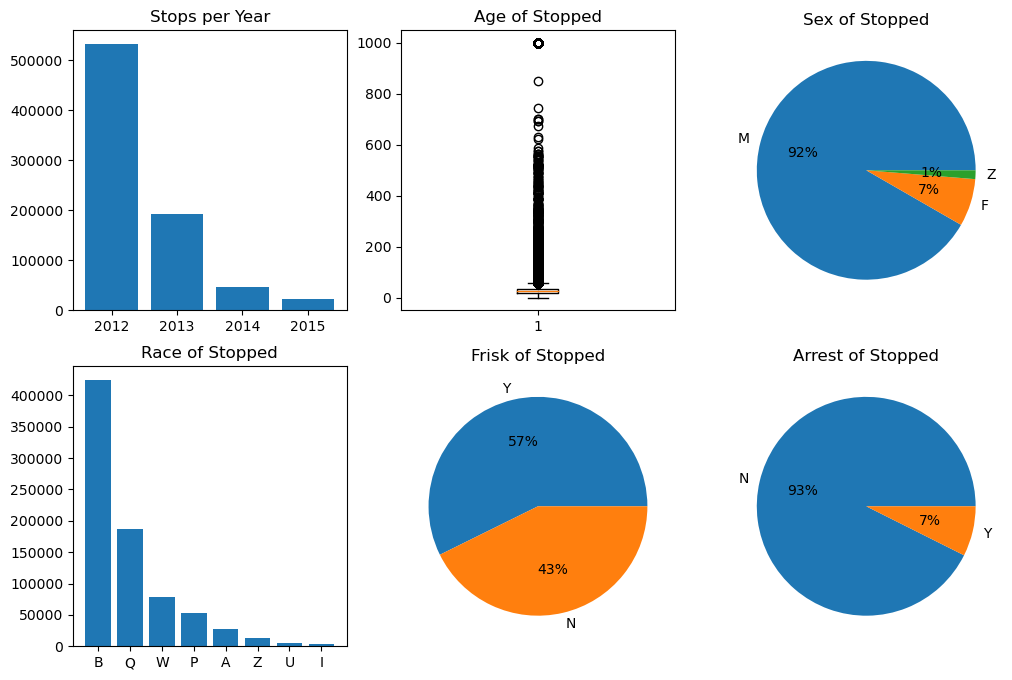

In [8]:
# Create six subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Create plots on each subplot
# Year
# Calculate year value counts
year_counts = saf_data['year'].value_counts()
print('Year Counts')
print(year_counts)
print('')

# Create bar chart for year individuals stopped
axes[0, 0].bar(year_counts.index, year_counts);
axes[0, 0].set_title('Stops per Year');


# Age
# Create boxplots on each subplot
axes[0, 1].boxplot(saf_data['age']);
axes[0, 1].set_title('Age of Stopped')
#axes[0, 1].set_ylabel('Age in Years');


# Sex
# Calculate sex value counts
sex_counts = saf_data['sex'].value_counts();
print('Sex Counts')
print(sex_counts)
print('')

# Create pie chart for sex of stopped individuals
axes[0, 2].pie(sex_counts, labels=sex_counts.index, autopct='%1.0f%%');
axes[0, 2].set_title('Sex of Stopped');


# Race
# Calculate race value counts
race_counts = saf_data['race'].value_counts();
print('Race Counts')
print(race_counts)
print('')

# Create bar chart for race of stopped individuals
axes[1, 0].bar(race_counts.index, race_counts);
axes[1, 0].set_title('Race of Stopped');


# Frisking
# Calculate frisk counts
frisk_counts = saf_data['frisked'].value_counts();
print('Frisk Counts')
print(frisk_counts)
print('')

# Create pie chart for crime suspicion of stopped individuals
axes[1, 1].pie(frisk_counts, labels=frisk_counts.index, autopct='%1.0f%%');
axes[1, 1].set_title('Frisk of Stopped');


# Arrest
# Calculate arrest counts
arrest_counts = saf_data['arstmade'].value_counts();
print('Arrest Counts')
print(arrest_counts)

# Create pie chart for crime suspicion of stopped individuals
axes[1, 2].pie(arrest_counts, labels=arrest_counts.index, autopct='%1.0f%%');
axes[1, 2].set_title('Arrest of Stopped');

#Save figure to drive
plt.savefig("C:\\Users\\mekna\\OneDrive\\Documents\\PSU\\DAAN_822\\Project\\Figures\\saf_stat_dashboard.png") 

In [9]:
#Count the number of obviously errant age values (all above 100 years old)
count = (saf_data['age'] > 100).sum()
count

1407

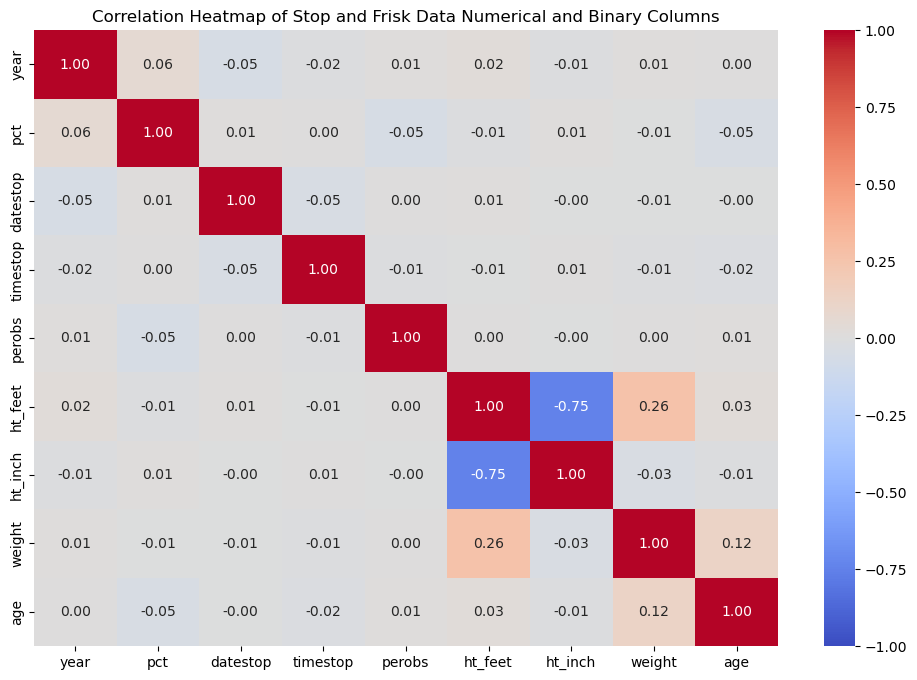

In [10]:
# Visualize correlation between feature in the numerical and binary columns with heatmap
plt.figure(figsize=(12, 8))
corr_matrix = analysis_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Heatmap of Stop and Frisk Data Numerical and Binary Columns')
#plt.show()

#Save figure to drive
plt.savefig("C:\\Users\\mekna\\OneDrive\\Documents\\PSU\\DAAN_822\\Project\\Figures\\saf_correlations.png") 

# SECTION 2: Analyze Crime data

This section analyzes Crime data from the data repository -> NYPD_Crime_Data.csv.

In [11]:
#View portion of Crime data frame
crime_data[0:100]

,Year,Reason,Status,Category,Value
0,2012,Misdemeanor Criminal Mischief,Victim,AMER IND,0.007
1,2012,Misdemeanor Criminal Mischief,Victim,ASIAN/PAC.ISL,0.084
2,2012,Misdemeanor Criminal Mischief,Victim,BLACK,0.365
3,2012,Misdemeanor Criminal Mischief,Victim,WHITE,0.289
4,2012,Misdemeanor Criminal Mischief,Victim,HISPANIC,0.254
5,2012,Misdemeanor Criminal Mischief,Victim,Total Victims/Suspects/Arrests,40985.000
6,2012,Misdemeanor Criminal Mischief,Victim,Known Race Ethnicity,25282.000
7,2012,Misdemeanor Criminal Mischief,Victim,% of Incidents With Race/Eth. Known,0.617
8,2012,Misdemeanor Criminal Mischief,Suspect,AMER IND,0.003
9,2012,Misdemeanor Criminal Mischief,Suspect,ASIAN/PAC.ISL,0.032


In [12]:
# Show data types in crime_data
pd.set_option('display.max_rows', None)
data_types = crime_data.dtypes
print(data_types)

Year          int64
Reason       object
Status       object
Category     object
Value       float64
dtype: object


In [13]:
# Identify column types
numerical_cols = ['Year','Value']
categorical_cols = ['Reason', 'Status', 'Category']

In [14]:
# Check categorical columns for unique values
for col in categorical_cols:
    print(f"\nUnique values in {col}: {crime_data[col].unique()}")


Unique values in Reason: ['Misdemeanor Criminal Mischief' 'Murder and Non-Negligent Manslaughter'
 'Rape ' 'Other Felony Sex Crimes' 'Robbery' 'Felonious Assault'
 'Grand Larceny' 'Misdemeanor Sex Crimes'
 'Misdemeanor Assault and Related Offenses' 'Petit Larceny'
 'Shootings (any crime where victim struck with bullet) '
 'Firearm Arrests (satisfying specific selection criteria)'
 'Proactive Offenses (Drugs) Arrests & Allegations'
 'Proactive Offenses (Property)'
 'Race/Ethnicity of Felony and Misdemeanor Juvenile Victim, Suspects and Arrestees  ']

Unique values in Status: ['Victim' 'Suspect' 'Arrestee' 'Felony' 'Misdemeanor' 'Suspects'
 'Property (Fel.)' 'Property (Misd.)' 'Victims' 'Arrestees']

Unique values in Category: ['AMER IND' 'ASIAN/PAC.ISL' 'BLACK' 'WHITE' 'HISPANIC'
 'Total Victims/Suspects/Arrests' 'Known Race Ethnicity'
 '% of Incidents With Race/Eth. Known' 'Total Arrests'
 'Total Arrests/Allegations' ' HISPANIC' 'Known Race/Ethnicity'
 '% with Race/Ethnicity Known']


In [15]:
#check rate at which arrest rates are known
arrests = crime_data[(crime_data['Category'] == '% of Incidents With Race/Eth. Known') & (crime_data['Status'] == 'Arrestee')]
arrests

,Year,Reason,Status,Category,Value
23,2012,Misdemeanor Criminal Mischief,Arrestee,% of Incidents With Race/Eth. Known,0.993
47,2012,Murder and Non-Negligent Manslaughter,Arrestee,% of Incidents With Race/Eth. Known,1.000
71,2012,Rape,Arrestee,% of Incidents With Race/Eth. Known,0.993
95,2012,Other Felony Sex Crimes,Arrestee,% of Incidents With Race/Eth. Known,0.976
119,2012,Robbery,Arrestee,% of Incidents With Race/Eth. Known,0.997
143,2012,Felonious Assault,Arrestee,% of Incidents With Race/Eth. Known,0.992
167,2012,Grand Larceny,Arrestee,% of Incidents With Race/Eth. Known,0.992
191,2012,Misdemeanor Sex Crimes,Arrestee,% of Incidents With Race/Eth. Known,0.986
215,2012,Misdemeanor Assault and Related Offenses,Arrestee,% of Incidents With Race/Eth. Known,0.992
239,2012,Petit Larceny,Arrestee,% of Incidents With Race/Eth. Known,0.988


In [16]:
#check arrest rates for different crimes
arrests_white = crime_data[(crime_data['Category'] == 'WHITE') & (crime_data['Status'] == 'Arrestee')]
arrests_black = crime_data[(crime_data['Category'] == 'BLACK') & (crime_data['Status'] == 'Arrestee')]
arrests_hispanic = crime_data[(crime_data['Category'] == 'HISPANIC') & (crime_data['Status'] == 'Arrestee')]
arrests_asian = crime_data[(crime_data['Category'] == 'ASIAN/PAC.ISL') & (crime_data['Status'] == 'Arrestee')]
arrests_amind = crime_data[(crime_data['Category'] == 'AMER IND') & (crime_data['Status'] == 'Arrestee')]

C:\Users\mekna\AppData\Local\Temp\ipykernel_19536\418501013.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_arrests_white = arrests_white[(arrests_white['Year'] == years[i])].mean()
C:\Users\mekna\AppData\Local\Temp\ipykernel_19536\418501013.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_arrests_black = arrests_black[(arrests_black['Year'] == years[i])].mean()
C:\Users\mekna\AppData\Local\Temp\ipykernel_19536\418501013.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reducti

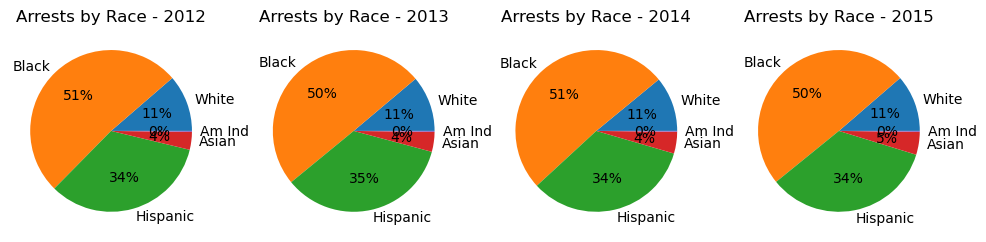

In [17]:
# Create six subplots
fig, axes = plt.subplots(1, 4, figsize=(12, 4))

# Create plots on each subplot
years = [2012,2013,2014,2015]
cat_labels = ['White','Black','Hispanic','Asian','Am Ind']

for i in range(len(years)):
    mean_arrests_white = arrests_white[(arrests_white['Year'] == years[i])].mean()
    mean_arrests_black = arrests_black[(arrests_black['Year'] == years[i])].mean()
    mean_arrests_hispanic = arrests_hispanic[(arrests_hispanic['Year'] == years[i])].mean()
    mean_arrests_asian = arrests_asian[(arrests_asian['Year'] == years[i])].mean()      
    mean_arrests_amind = arrests_amind[(arrests_amind['Year'] == years[i])].mean()

    arrests_by_race = [mean_arrests_white.Value,mean_arrests_black.Value,mean_arrests_hispanic.Value,mean_arrests_asian.Value,mean_arrests_amind.Value]

    # Create pie chart for arrests
    axes[i].pie(arrests_by_race, labels=cat_labels, autopct='%1.0f%%');
    axes[i].set_title('Arrests by Race - ' + str(years[i]));
    
#Save figure to drive
plt.savefig("C:\\Users\\mekna\\OneDrive\\Documents\\PSU\\DAAN_822\\Project\\Figures\\arrests_by_race.png") 

# SECTION 3: Analyze Population data

This section analyzes Census data from the data repository -> NYC_Census_Data.csv.

In [18]:
#View Crime data frame
census_data

,YEAR,BRONX TOTAL,BRONX WHITE,BRONX BLACK,BRONX ASIAN,BRONX NATIVE,BRONX PAC ISLANDER,BRONX OTHER,BRONX TOTAL OTHER,BRONX MULTI,...,STATEN ISLAND TOTAL,STATEN ISLAND WHITE,STATEN ISLAND BLACK,STATEN ISLAND ASIAN,STATEN ISLAND NATIVE,STATEN ISLAND PAC ISLANDER,STATEN ISLAND OTHER,STATEN ISLAND TOTAL OTHER,STATEN ISLAND MULTI,STATEN ISLAND HISPANIC
0,2010,1385108.0,151209.0,416695.0,47335.0,3460.0,398.0,8636.0,12494.0,15962.0,...,468730.0,300169.0,44313.0,34697.0,695.0,137.0,1028.0,1860.0,6640.0,81051.0
1,2011,1393862.6,149167.7,416964.8,49378.1,NaN,NaN,NaN,13231.2,17202.8,...,471431.7,297950.2,44565.2,37102.6,NaN,NaN,NaN,2064.0,7107.8,82641.9
2,2012,1402617.2,147126.4,417234.6,51421.2,NaN,NaN,NaN,13968.4,18443.6,...,474133.4,295731.4,44817.4,39508.2,NaN,NaN,NaN,2268.0,7575.6,84232.8
3,2013,1411371.8,145085.1,417504.4,53464.3,NaN,NaN,NaN,14705.6,19684.4,...,476835.1,293512.6,45069.6,41913.8,NaN,NaN,NaN,2472.0,8043.4,85823.7
4,2014,1420126.4,143043.8,417774.2,55507.4,NaN,NaN,NaN,15442.8,20925.2,...,479536.8,291293.8,45321.8,44319.4,NaN,NaN,NaN,2676.0,8511.2,87414.6
5,2015,1428881.0,141002.5,418044.0,57550.5,NaN,NaN,NaN,16180.0,22166.0,...,482238.5,289075.0,45574.0,46725.0,NaN,NaN,NaN,2880.0,8979.0,89005.5
6,2016,1437635.6,138961.2,418313.8,59593.6,NaN,NaN,NaN,16917.2,23406.8,...,484940.2,286856.2,45826.2,49130.6,NaN,NaN,NaN,3084.0,9446.8,90596.4
7,2017,1446390.2,136919.9,418583.6,61636.7,NaN,NaN,NaN,17654.4,24647.6,...,487641.9,284637.4,46078.4,51536.2,NaN,NaN,NaN,3288.0,9914.6,92187.3
8,2018,1455144.8,134878.6,418853.4,63679.8,NaN,NaN,NaN,18391.6,25888.4,...,490343.6,282418.6,46330.6,53941.8,NaN,NaN,NaN,3492.0,10382.4,93778.2
9,2019,1463899.4,132837.3,419123.2,65722.9,NaN,NaN,NaN,19128.8,27129.2,...,493045.3,280199.8,46582.8,56347.4,NaN,NaN,NaN,3696.0,10850.2,95369.1


In [19]:
# Show data types in crime_data
pd.set_option('display.max_rows', None)
data_types = census_data.dtypes
print(data_types)

YEAR                            int64
BRONX TOTAL                   float64
BRONX WHITE                   float64
BRONX BLACK                   float64
BRONX ASIAN                   float64
BRONX NATIVE                  float64
BRONX PAC ISLANDER            float64
BRONX OTHER                   float64
BRONX TOTAL OTHER             float64
BRONX MULTI                   float64
BRONX HISPANIC                float64
BROOKLYN TOTAL                float64
BROOKLYN WHITE                float64
BROOKLYN BLACK                float64
BROOKLYN ASIAN                float64
BROOKLYN NATIVE               float64
BROOKLYN PAC ISLANDER         float64
BROOKLYN OTHER                float64
BROOKLYN TOTAL OTHER          float64
BROOKLYN MULTI                float64
BROOKLYN HISPANIC             float64
MANHATTAN TOTAL               float64
MANHATTAN WHITE               float64
MANHATTAN BLACK               float64
MANHATTAN ASIAN               float64
MANHATTAN NATIVE              float64
MANHATTAN PA

C:\Users\mekna\AppData\Local\Temp\ipykernel_19536\74603426.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i, j].set_xticklabels(years);
C:\Users\mekna\AppData\Local\Temp\ipykernel_19536\74603426.py:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 2].set_xticklabels(years);


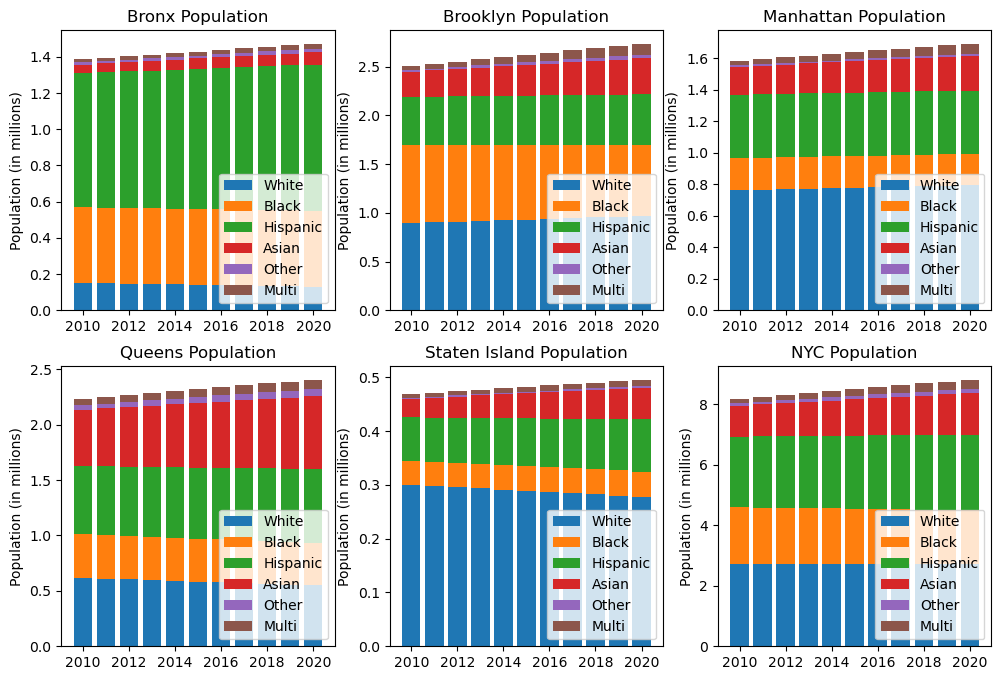

In [27]:
# Create six subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

#Create list of neighborhoods
nbhds = ['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
years = ['2008','2010','2012','2014','2016','2018','2020']

counter = 0
w_counts_all_nyc = 0
b_counts_all_nyc = 0
h_counts_all_nyc = 0
a_counts_all_nyc = 0
o_counts_all_nyc = 0
m_counts_all_nyc = 0

for i in range(3):
    for j in range(3):
        if counter <= 4:
    
            # White
            group = nbhds[counter].upper() + ' WHITE'
            w_counts = census_data[group]/1000000;
            w_counts_all_nyc = w_counts_all_nyc + w_counts
    
            # Black
            group = nbhds[counter].upper() + ' BLACK'
            b_counts = census_data[group]/1000000;
            b_counts_all_nyc = b_counts_all_nyc + b_counts
    
            # Hispanic
            group = nbhds[counter].upper() + ' HISPANIC'
            h_counts = census_data[group]/1000000;
            h_counts_all_nyc = h_counts_all_nyc + h_counts
    
            # Asian
            group = nbhds[counter].upper() + ' ASIAN'
            a_counts = census_data[group]/1000000;
            a_counts_all_nyc = a_counts_all_nyc + a_counts
    
            # Other
            group = nbhds[counter].upper() + ' TOTAL OTHER'
            o_counts = census_data[group]/1000000;
            o_counts_all_nyc = o_counts_all_nyc + o_counts
    
            # Multi
            group = nbhds[counter].upper() + ' MULTI'
            m_counts = census_data[group]/1000000;
            m_counts_all_nyc = m_counts_all_nyc + m_counts
    
            # Create stacked bar chart for census stats by race
            axes[i, j].bar(b_counts.index, w_counts, label='White')
            axes[i, j].bar(b_counts.index, b_counts, bottom=w_counts, label='Black')
            axes[i, j].bar(b_counts.index, h_counts, bottom=w_counts + b_counts, label='Hispanic')
            axes[i, j].bar(b_counts.index, a_counts, bottom=w_counts + b_counts + h_counts, label='Asian')
            axes[i, j].bar(b_counts.index, o_counts, bottom=w_counts + b_counts + h_counts + a_counts, label='Other')
            axes[i, j].bar(b_counts.index, m_counts, bottom=w_counts + b_counts + h_counts + a_counts + o_counts, label='Multi')
            axes[i, j].legend(loc='lower right')
            axes[i, j].set_title(nbhds[counter] + ' Population');
            axes[i, j].set_xticklabels(years);
            #axes[i, j].set_xlabel('Year');
            axes[i, j].set_ylabel('Population (in millions)');
    
            counter+=1
        
# Create stacked bar chart for census stats by race - all NYC
axes[1, 2].bar(b_counts.index, w_counts_all_nyc, label='White')
axes[1, 2].bar(b_counts.index, b_counts_all_nyc, bottom=w_counts_all_nyc, label='Black')
axes[1, 2].bar(b_counts.index, h_counts_all_nyc, bottom=w_counts_all_nyc + b_counts_all_nyc, label='Hispanic')
axes[1, 2].bar(b_counts.index, a_counts_all_nyc, bottom=w_counts_all_nyc + b_counts_all_nyc + h_counts_all_nyc, label='Asian')
axes[1, 2].bar(b_counts.index, o_counts_all_nyc, bottom=w_counts_all_nyc + b_counts_all_nyc + h_counts_all_nyc + a_counts_all_nyc, label='Other')
axes[1, 2].bar(b_counts.index, m_counts_all_nyc, bottom=w_counts_all_nyc + b_counts_all_nyc + h_counts_all_nyc + a_counts_all_nyc + o_counts_all_nyc, label='Multi')
axes[1, 2].legend(loc='lower right')
axes[1, 2].set_title('NYC Population');
axes[1, 2].set_xticklabels(years);
#axes[1, 2].set_xlabel('Year');
axes[1, 2].set_ylabel('Population (in millions)');

#Save figure to drive
plt.savefig("C:\\Users\\mekna\\OneDrive\\Documents\\PSU\\DAAN_822\\Project\\Figures\\nyc_population.png") 

In [21]:
#Show NYC population totals
print('All NYC: White')
print(w_counts_all_nyc)
print('')
print('All NYC: Black')
print(b_counts_all_nyc)
print('')
print('All NYC: Hispanic')
print(h_counts_all_nyc)
print('')
print('All NYC: Asian')
print(a_counts_all_nyc)
print('')
print('All NYC: Other')
print(o_counts_all_nyc)
print('')
print('All NYC: Multi')
print(m_counts_all_nyc)
print('')

All NYC: White
0     2.722904
1     2.722599
2     2.722294
3     2.721990
4     2.721685
5     2.721380
6     2.721075
7     2.720770
8     2.720466
9     2.720161
10    2.719856
dtype: float64

All NYC: Black
0     1.861295
1     1.852855
2     1.844414
3     1.835974
4     1.827533
5     1.819093
6     1.810653
7     1.802212
8     1.793772
9     1.785331
10    1.776891
dtype: float64

All NYC: Hispanic
0     2.336076
1     2.351503
2     2.366931
3     2.382358
4     2.397786
5     2.413213
6     2.428640
7     2.444068
8     2.459495
9     2.474923
10    2.490350
dtype: float64

All NYC: Asian
0     1.028119
1     1.062657
2     1.097196
3     1.131734
4     1.166272
5     1.200810
6     1.235349
7     1.269887
8     1.304425
9     1.338964
10    1.373502
dtype: float64

All NYC: Other
0     0.078063
1     0.084620
2     0.091177
3     0.097734
4     0.104291
5     0.110847
6     0.117404
7     0.123961
8     0.130518
9     0.137075
10    0.143632
dtype: float64

All NYC: Multi
0 